In [1]:
from mdagent import MDAgent
import os

In [2]:
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_4_descriptive = get_prompt("descriptive", 4)
prompt_4_natural = get_prompt("natural", 4)

prompt_4_descriptive, prompt_4_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1ps at 300 K. 4. Compute the RMSD.',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD of the simulation.')

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_4_descriptive)

Thought: First, I need to download the PDB file 1LYZ.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Next, I need to report the secondary structure assignments of the downloaded PDB structure.
Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_101703",
    "top_file": "1LYZ_101703",
    "target_frames": "first"
  }
}
```Next, I need to simulate for 1ps at 300 K.
Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_101703",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": True,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": False
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_101703: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_101703
 rec0_101705: dssp values for trajectory with id: 1LYZ_101703


In [16]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_101703"))

In [17]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_101703", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [8]:
# # make sure trajectory and topology exist
# traj_path_1 = registry_1.get_mapped_path("<traj_path>")
# top_path_1 = registry_1.get_mapped_path("<top_path>")

# assert os.path.exists(traj_path_1)
# assert os.path.exists(top_path_1)

In [9]:
# # make sure rmsd plot was generated
# from IPython.display import Image
# Image(filename=registry_1.get_mapped_path('<rmsd_plot>'))

In [10]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_4_natural)

Thought: First, I need to download the PDB file for 1LYZ. Then, I can simulate it for 1ps at 300 K and compute the RMSD of the simulation. I also need to report the secondary structure assignments of the downloaded PDB structure.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can simulate it for 1ps at 300 K and compute the RMSD of the simulation. I also need to report the secondary structure assignments of the downloaded PDB structure.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_101944",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [11]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_101944: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_101944
 1LYZ_101952: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_101956: Initial positions for simulation sim0_101956
 sim0_101956: Basic Simulation of Protein 1LYZ_101952
 rec0_101956: Simulation trajectory for protein 1LYZ_101952 and simulation sim0_101956
 rec1_101956: Simulation state log for protein 1LYZ_101952 and simulation sim0_101956
 rec2_101956: Simulation pdb frames for protein 1LYZ_101952 and simulation sim0_101956
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_102005: RMSD plot for 1LYZ
 rec0_102010: dssp values for trajectory with id: 1LYZ_101952


In [18]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_101944"))

In [20]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_101944", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [23]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_101956")
top_path_2 = registry_2.get_mapped_path("top_sim0_101956")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

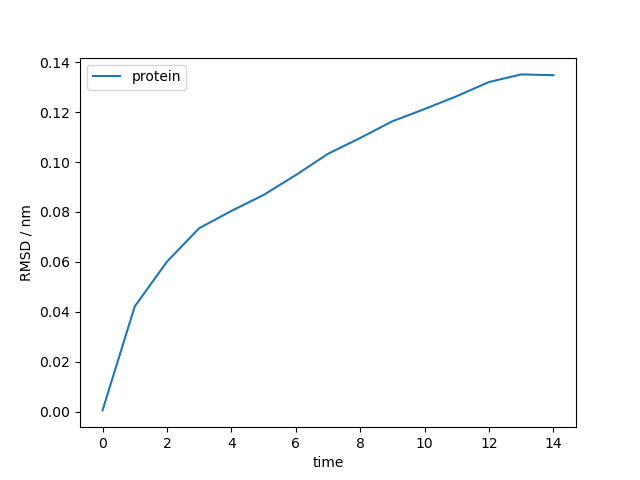

In [24]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_102005'))